# Comparison Bagging vs. RF vs. Decision Tree


In [1]:
# Bootstrap aggregation
import warnings
import numpy as np 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df['International plan'] = df['International plan'].map({'Yes':1,'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True:1, False:0})

### RandomForesrtClassifier
1. bootstrap: use True, prevent overfitting
2. criterion: gini/entropy, what method you use for selecting node 
3. max_feature: maximum number, you cannot split features more than this number
    (1). auto: max = sqrt(n_features)
    (2). sqrt: max = sqrt(n_features)
    (3). log2: max = log2(n_features)
    (4). None: max = n_features
4. min_samples_split: minimum number of samples should be on a node to split. (if samples on a node is less than min_samples_split, then it cannot split anymore)
5. min_samples_leaf: minimum number of samples should be on a leaf node. (if samples in the left leaf node <min_sample_leaf,then we should remove left leaf node.)
6. max_leaf_nodes: 
7. min_impurity_split: a threshold decide whether this node should be split
8. min_impurity_decrease: ??? what's difference with min_impurity_split
9. n_estimator: how many trees in the forest

In [4]:
y = df['Churn']
X = df.drop(['Churn','State'],axis=1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)
results = cross_val_score(rfc, X,y, cv=skf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably mea

CV accuracy score: 94.12%


C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [5]:
## fine tune parameters - max_depth 
trees_count = [5, 10, 15, 20, 30, 50, 75, 100]
train_cv_ac = []
test_ac = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for trees in trees_count:
    rfc = RandomForestClassifier(n_estimators=trees, random_state=42, n_jobs=-1, oob_score=True)
    
    temp_cv_ac = []
    temp_test_ac = []
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfc.fit(X_train, y_train)
        temp_cv_ac.append(rfc.score(X_train, y_train))
        temp_test_ac.append(rfc.score(X_test, y_test))
    train_cv_ac.append(temp_cv_ac)
    test_ac.append(temp_test_ac)
    print("Tree# %d cv accuracy: %f, test accuracy: %f" %(trees, np.mean(temp_cv_ac)*100, np.mean(temp_test_ac)*100))
    
    
    
#     temp_results = cross_val_score(rfc, X, y, cv=skf) same as above
#     print("Trees# %d accuracy: %f" %(trees, np.mean(temp_results)*100))

C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably mea

Tree# 5 cv accuracy: 99.047422, test accuracy: 93.729397


C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably mea

Tree# 10 cv accuracy: 99.279904, test accuracy: 94.119247


C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\900309\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably mea

Tree# 15 cv accuracy: 99.752475, test accuracy: 94.779322
Tree# 20 cv accuracy: 99.797480, test accuracy: 94.779187
Tree# 30 cv accuracy: 99.872491, test accuracy: 94.989172
Tree# 50 cv accuracy: 99.939993, test accuracy: 95.199292
Tree# 75 cv accuracy: 99.992501, test accuracy: 95.439307
Tree# 100 cv accuracy: 100.000000, test accuracy: 95.439262


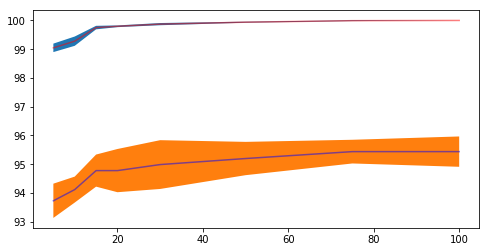

In [19]:
train_cv_ac, test_ac = np.asarray(train_cv_ac), np.asarray(test_ac)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(trees_count, train_cv_ac.mean(axis=1)*100, alpha=0.5, color="red", label="train")
ax.plot(trees_count, test_ac.mean(axis=1)*100, alpha=0.5, color="blue", label="cv")
ax.fill_between(trees_count, train_cv_ac.mean(axis=1)*100-train_cv_ac.std(axis=1)*100, 
                train_cv_ac.mean(axis=1)*100+train_cv_ac.std(axis=1)*100)
ax.fill_between(trees_count, test_ac.mean(axis=1)*100-test_ac.std(axis=1)*100, 
                test_ac.mean(axis=1)*100+test_ac.std(axis=1)*100)
    

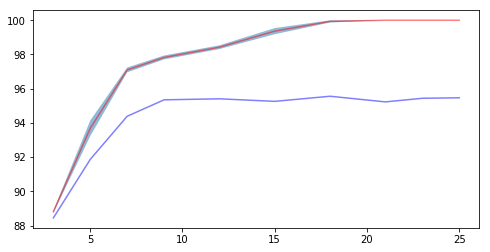

In [26]:
# looks like tree#100 has overfit phnomenon
max_depth = [3,5,7,9,12,15,18,21,23,25]
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
train_cv_ac = []
test_ac = []

for tree_depth in max_depth:
    rfc = RandomForestClassifier(n_estimators=100, max_depth=tree_depth, oob_score=True, 
                                 random_state=42, n_jobs=-1)
    temp_train_cv_ac = []
    temp_test_ac = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfc.fit(X_train, y_train)
        temp_train_cv_ac.append(rfc.score(X_train, y_train))
        temp_test_ac.append(rfc.score(X_test, y_test))
        
    train_cv_ac.append(temp_train_cv_ac)
    test_ac.append(temp_test_ac)
    
train_cv_ac, test_ac = np.asarray(train_cv_ac), np.asarray(test_ac)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(max_depth, train_cv_ac.mean(axis=1)*100, alpha=0.5, color="red", label="train")
ax.plot(max_depth, test_ac.mean(axis=1)*100, alpha=0.5, color="blue", label="cv")
ax.fill_between(max_depth, train_cv_ac.mean(axis=1)*100-train_cv_ac.std(axis=1)*100, 
               train_cv_ac.mean(axis=1)*100+train_cv_ac.std(axis=1)*100, alpha=0.5)
        

In [27]:
parameters = {'max_features':[4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            oob_score=True)

gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X,y)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.9546954695469547)

array([0.02833874, 0.00858324, 0.08324917, 0.02008545, 0.03067323,
       0.13906769, 0.02998106, 0.14211696, 0.06669021, 0.02607314,
       0.0682471 , 0.03624146, 0.02829869, 0.04016323, 0.04154407,
       0.05099206, 0.04111849, 0.11853603])